https://tensorflow.blog/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95-tf-gradients/

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [3]:
print(sess.run(tf.gradients(y , x )))
print(sess.run(tf.gradients(y , b )))

NameError: name 'y' is not defined

In [9]:
data = pd.read_csv("./../data/credit44_sc.csv"  )

In [10]:
x = tf.placeholder(tf.float32 , [None , np.shape(data)[1]])
a = tf.reduce_mean(tf.pow((x - tf.reduce_mean(x , axis = 0 )) , 4 ), axis = 0)
b = tf.pow(tf.reduce_mean(tf.pow((x - tf.reduce_mean(x , axis = 0 )) , 2 ), axis = 0), 2)
out2 = tf.divide(a , b )
out2 = tf.expand_dims(out2, axis = 0 )

In [12]:
out3 = tf.reduce_mean(out2)
out3

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [22]:
out = tf.gradients(out3, a )
out

[<tf.Tensor 'gradients_5/truediv_grad/Reshape:0' shape=(45,) dtype=float32>]

In [23]:
output2 = sess.run(out, feed_dict={x: data.values})
output2[0]

array([9.1437746e-10, 1.5153097e-10, 1.1096938e-09, 8.3811749e-03,
       1.4437142e-02, 1.0527557e-16, 1.1469628e-16, 1.1940468e-03,
       5.4433848e-15, 1.1247853e-03, 4.3284908e-05, 2.1530411e-06,
       6.8728485e-05, 5.4433848e-15, 4.0048849e-06, 3.5791348e-15,
       1.2632618e-15, 1.4348382e-04, 4.6577098e-33, 2.8184904e-03,
       4.2089629e-03, 8.1880702e-10, 4.0048849e-06, 3.5037026e-10,
       3.4334097e-10, 3.4334097e-10, 4.6577142e-33, 3.4573341e-10,
       2.1696351e-15, 1.7093202e-02, 3.4573341e-10, 2.3303864e-10,
       3.4332268e-10, 3.3033497e-04, 2.3012624e-10, 3.4999448e-17,
       1.7792012e-28, 4.2089629e-03, 2.4732529e-09, 7.1101447e-10,
       1.8623023e-03, 5.1144195e-08, 3.4844311e-06, 8.9140358e-18,
       4.0425557e-01], dtype=float32)

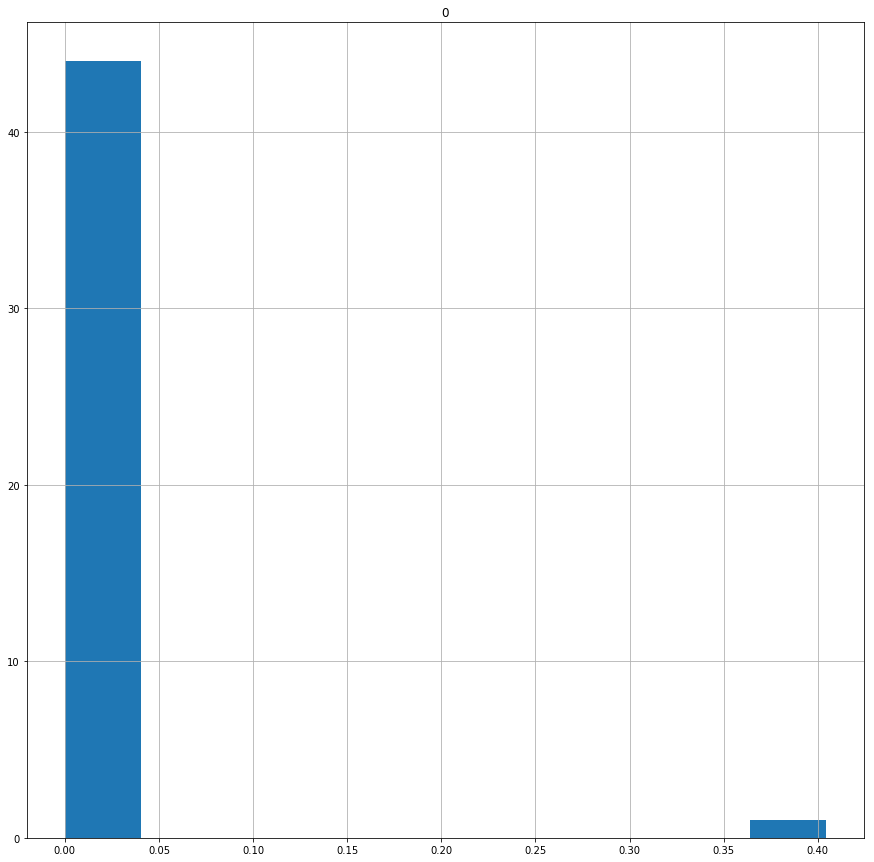

In [24]:
pd.DataFrame(output2[0]).hist(figsize=(15,15))
plt.show()

In [5]:
x = tf.constant(1.0)
b = tf.constant(2.0)

y = x + 2*b 
s = tf.sigmoid(y)
sess.run(tf.gradients(s, y))


[0.006648033]

$$ \frac{\partial s}{\partial x} = \frac{\partial s}{\partial y} \times \frac{\partial y}{\partial x} $$

똑같은 것을 확인

In [30]:
x = tf.constant(1.0)
b = tf.constant(2.0)

y = 5*x + b 
s = tf.sigmoid(y)
sess.run(tf.gradients(s, x))

[0.0045508374]

In [35]:
sess.run(tf.gradients(s, y))[0]  * sess.run(tf.gradients(y, x))[0]

0.0045508374

In [38]:
a , b = sess.run(tf.gradients(s, [y , x ]))


4.1420244e-06


In [39]:
a

0.00091016747

In [40]:
b

0.0045508374

In [41]:
sess.run(tf.gradients(s, y))[0] 

0.00091016747

5.0